# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade geopandas
import geopandas as gpd

     |████████████████████████████████| 994 kB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 31.4 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lendo dados de vacinação

In [8]:
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Gráficos e mapas com dados de vacinação em Sergipe/PLANILHA-VACINACAO-29-de-setembro-1.xlsx"

In [9]:
df_vacina_sergipe = pd.read_excel(caminho, skiprows=2, nrows=76)

In [10]:
df_vacina_sergipe

,Unnamed: 0,População Total,60 a 69 anos,70 a 79 anos,80 anos e mais,Total de 1ª dose enviada,Total de 2ª dose enviadas,Total de dose única enviadas,Total de Dose de Reforço,Total de 1ª dose aplicada,Total de 2ª dose aplicada***,Total de dose única aplicada,Total de dose de reforço aplicada,1ª dose,2ª dose,DU,1ª dose.1,2ª dose.1,DU.1,Ref,1ª dose.2,2ª dose.2,DU.2,Ref.1,1ª dose.3,2ª dose.3,DU.3,Ref.2,1ª dose.4,2ª dose.4,DU.4,1ª dose.5,2ª dose.5,DU.5,1ª dose.6,2ª dose.6,DU.6,1ª dose.7,2ª dose.7,DU.7,...,DU.25,1ª dose.26,2ª dose.26,DU.26,1ª dose.27,2ª dose.27,DU.27,1ª dose.28,2ª dose.28,DU.28,1ª dose.29,2ª dose.29,DU.29,1ª dose.30,2ª dose.30,DU.30,1ª dose.31,2ª dose.31,DU.31,1ª dose.32,2ª dose.32,DU.32,1ª dose.33,2ª dose.33,DU.33,1ª dose.34,2ª dose.34,DU.34,Ref.4,População Geral,60 a 69 anos.1,70 a 79 anos.1,80 anos e mais***,População Geral.1,60 a 69 anos.2,70 a 79 anos.2,80 anos e mais.1,% D1,% D2,% DU
0,280010 Amparo de São Francisco,2380,140,89,51,1.739000e+03,1385,30,46,1660,1227,30,0,72,69,5,42,41,0,0,99,99,0,0,147,140,0,0,43,39,1,47,33,1,60,46,3,70,61,3,...,0,1,1,0,2,2,0,19,18,0,106,57,1,122,60,0,56,14,0,77,0,0,0,0,0,0,0,0,0,0.710084,1.050000,1.112360,0.823529,0.528151,1.000000,1.112360,0.803922,0.954572,0.885921,1.000000
1,280020 Aquidabã,21681,1543,932,481,1.610500e+04,10597,210,474,14464,7893,212,0,473,449,0,486,446,0,0,876,858,0,0,1476,1437,3,0,617,510,9,797,584,13,953,599,19,949,622,30,...,0,0,0,0,106,62,0,47,40,0,983,285,0,1088,14,0,530,0,0,716,0,0,591,0,0,18,17,0,0,0.676906,0.956578,0.939914,1.010395,0.373830,0.931303,0.920601,0.927235,0.898106,0.744833,1.009524
2,280030 Aracaju,664908,47854,24138,10149,5.078920e+05,374308,12715,13835,476349,285392,12589,3803,40240,49756,819,12203,11728,35,308,25152,32245,45,2547,45317,44327,62,594,21032,16906,129,25446,21100,77,29201,25925,495,31403,23116,3125,...,5,284,83,0,721,76,43,852,229,0,38762,10401,749,36660,2580,1430,14566,524,183,20860,0,0,4041,0,0,249,235,79,273,0.735347,0.946985,1.042008,1.202384,0.448154,0.926297,1.335860,1.155582,0.937894,0.762452,0.990090
3,280040 Arauá,9947,644,348,149,7.180000e+03,5225,100,225,7242,4526,102,16,175,174,0,211,212,0,16,470,471,0,0,654,673,2,0,327,241,17,349,644,30,782,276,41,436,124,5,...,0,0,0,0,30,30,0,12,12,0,490,237,0,572,307,0,258,116,0,223,0,0,0,0,0,0,0,0,0,0.738313,1.015528,1.350575,1.416107,0.465266,1.045031,1.353448,1.422819,1.008635,0.866220,1.020000
4,280050 Areia Branca,18686,1047,548,281,1.311800e+04,9052,185,336,13134,7114,198,0,300,259,5,346,315,0,0,592,583,0,0,1071,1176,1,0,497,601,6,718,713,11,794,605,49,906,1190,77,...,0,180,0,0,0,0,0,28,18,0,1264,401,0,1545,152,0,484,38,0,317,0,0,305,0,0,0,0,0,0,0.713475,1.022923,1.080292,1.231317,0.391309,1.123209,1.063869,1.120996,1.001220,0.785904,1.070270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,280730 Telha,3249,178,100,49,2.331000e+03,1705,45,70,2206,1327,46,0,105,98,0,59,59,0,0,104,103,0,0,185,188,0,0,79,76,4,62,51,4,82,51,19,141,39,16,...,0,0,0,0,4,3,0,23,18,0,168,52,0,188,67,0,80,2,0,114,0,0,33,0,0,0,0,0,0,0.693136,1.039326,1.040000,1.204082,0.422592,1.056180,1.030000,1.204082,0.946375,0.778299,1.022222
72,280740 Tobias Barreto,52530,3513,2188,1046,3.707800e+04,25690,1160,1364,36533,19232,1187,8,1670,1271,0,1332,1116,1,7,2133,2139,0,1,3319,3311,7,0,1249,1252,29,1897,1213,116,1633,758,359,2129,839,446,...,0,82,69,0,1090,801,159,43,40,0,2693,854,0,2874,209,0,1119,201,0,1720,0,0,1597,5,0,35,33,0,0,0.718066,0.944777,0.974863,1.273423,0.388711,0.942499,0.977605,1.066922,0.985301,0.748618,1.023276
73,280750 Tomar do Geru,13535,760,446,208,9.965000e+03,6333,135,246,7845,4318,139,2,216,167,0,210,230,0,1,459,441,0,0,779,703,0,0,427,396,0,587,394,0,563,441,0,600,438,0,...,0,0,0,0,22,11,0,27,3,0,601,2

# Separando o DataFrame em Sub-Conjuntos: Estimativa Populacional, Doses, Cobertura da 1ª dose, Cobertura da 2ª dose

In [11]:
df_estimativa_populacional = df_vacina_sergipe.iloc[:, 0:2]
df_estimativa_populacional.columns = ["Município", "População Total"]

In [12]:
# Remove o número antes do nome do município

for i in range(0, len(df_estimativa_populacional) - 1):
  nome = df_estimativa_populacional["Município"][i]
  numero = nome.split()[0]
  nome = nome.replace(numero, '')
  df_estimativa_populacional["Município"][i] = nome[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
df_estimativa_populacional

,Município,População Total
0,Amparo de São Francisco,2380
1,Aquidabã,21681
2,Aracaju,664908
3,Arauá,9947
4,Areia Branca,18686
...,...,...
71,Telha,3249
72,Tobias Barreto,52530
73,Tomar do Geru,13535
74,Umbaúba,25550


------------------------------------------------------------------------





**DataFrame com a quantidade de vacinas enviadas e aplicadas da 1ª e 2ª dose**

In [14]:
df_doses = df_vacina_sergipe.iloc[:, 5:7]
df_doses = pd.concat([df_estimativa_populacional, df_doses], axis=1)
df_doses = pd.concat([df_doses, df_vacina_sergipe.iloc[:, 9:11]], axis=1)

In [15]:
df_doses

,Município,População Total,Total de 1ª dose enviada,Total de 2ª dose enviadas,Total de 1ª dose aplicada,Total de 2ª dose aplicada***
0,Amparo de São Francisco,2380,1.739000e+03,1385,1660,1227
1,Aquidabã,21681,1.610500e+04,10597,14464,7893
2,Aracaju,664908,5.078920e+05,374308,476349,285392
3,Arauá,9947,7.180000e+03,5225,7242,4526
4,Areia Branca,18686,1.311800e+04,9052,13134,7114
...,...,...,...,...,...,...
71,Telha,3249,2.331000e+03,1705,2206,1327
72,Tobias Barreto,52530,3.707800e+04,25690,36533,19232
73,Tomar do Geru,13535,9.965000e+03,6333,7845,4318
74,Umbaúba,25550,1.801300e+04,11787,16610,8230


In [16]:
cobertura_1_dose = df_vacina_sergipe.iloc[:, 123:124]
cobertura_1_dose = pd.concat([df_estimativa_populacional, cobertura_1_dose], axis=1)

In [17]:
cobertura_1_dose

,Município,População Total,População Geral
0,Amparo de São Francisco,2380,0.710084
1,Aquidabã,21681,0.676906
2,Aracaju,664908,0.735347
3,Arauá,9947,0.738313
4,Areia Branca,18686,0.713475
...,...,...,...
71,Telha,3249,0.693136
72,Tobias Barreto,52530,0.718066
73,Tomar do Geru,13535,0.589878
74,Umbaúba,25550,0.659374


In [18]:
cobertura_2_dose = df_vacina_sergipe.iloc[:, 127:128]
cobertura_2_dose = pd.concat([df_estimativa_populacional, cobertura_2_dose], axis=1)

In [19]:
cobertura_2_dose

,Município,População Total,População Geral.1
0,Amparo de São Francisco,2380,0.528151
1,Aquidabã,21681,0.373830
2,Aracaju,664908,0.448154
3,Arauá,9947,0.465266
4,Areia Branca,18686,0.391309
...,...,...,...
71,Telha,3249,0.422592
72,Tobias Barreto,52530,0.388711
73,Tomar do Geru,13535,0.329294
74,Umbaúba,25550,0.331389


# Explorando os dados

## Lendo Dados Geográficos para plotar os mapas

In [ ]:
df_sergipe_mapa = gpd.read_file("/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Gráficos e mapas com dados de vacinação em Sergipe/28MUE250GC_SIR.shp")

In [ ]:
df_sergipe_mapa

,NM_MUNICIP,CD_GEOCMU,geometry
0,AMPARO DE SÃO FRANCISCO,2800100,"POLYGON ((-36.92631 -10.12655, -36.92575 -10.1..."
1,AQUIDABÃ,2800209,"POLYGON ((-37.05740 -10.18109, -37.01690 -10.1..."
2,ARACAJU,2800308,"POLYGON ((-37.03528 -10.87519, -37.03643 -10.8..."
3,ARAUÁ,2800407,"MULTIPOLYGON (((-37.63498 -11.34699, -37.63843..."
4,AREIA BRANCA,2800506,"POLYGON ((-37.28128 -10.72058, -37.28128 -10.7..."
...,...,...,...
70,SIRIRI,2807204,"POLYGON ((-37.13391 -10.47233, -37.13343 -10.4..."
71,TELHA,2807303,"POLYGON ((-36.86737 -10.15755, -36.86430 -10.1..."
72,TOBIAS BARRETO,2807402,"POLYGON ((-38.02544 -10.81599, -38.02497 -10.8..."
73,TOMAR DO GERU,2807501,"POLYGON ((-37.91875 -11.26552, -37.91856 -11.2..."


## Doses

In [20]:
df_doses.head()

,Município,População Total,Total de 1ª dose enviada,Total de 2ª dose enviadas,Total de 1ª dose aplicada,Total de 2ª dose aplicada***
0,Amparo de São Francisco,2380,1739.000000,1385,1660,1227
1,Aquidabã,21681,16105.000000,10597,14464,7893
2,Aracaju,664908,507891.968441,374308,476349,285392
3,Arauá,9947,7180.000000,5225,7242,4526
4,Areia Branca,18686,13118.000000,9052,13134,7114


In [22]:
df_doses['Total de 1ª dose enviada'] = df_doses['Total de 1ª dose enviada'].astype(int)

In [23]:
df_doses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Município                     76 non-null     object
 1   População Total               76 non-null     int64 
 2   Total de 1ª dose enviada      76 non-null     int64 
 3   Total de 2ª dose enviadas     76 non-null     int64 
 4   Total de 1ª dose aplicada     76 non-null     int64 
 5   Total de 2ª dose aplicada***  76 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.7+ KB


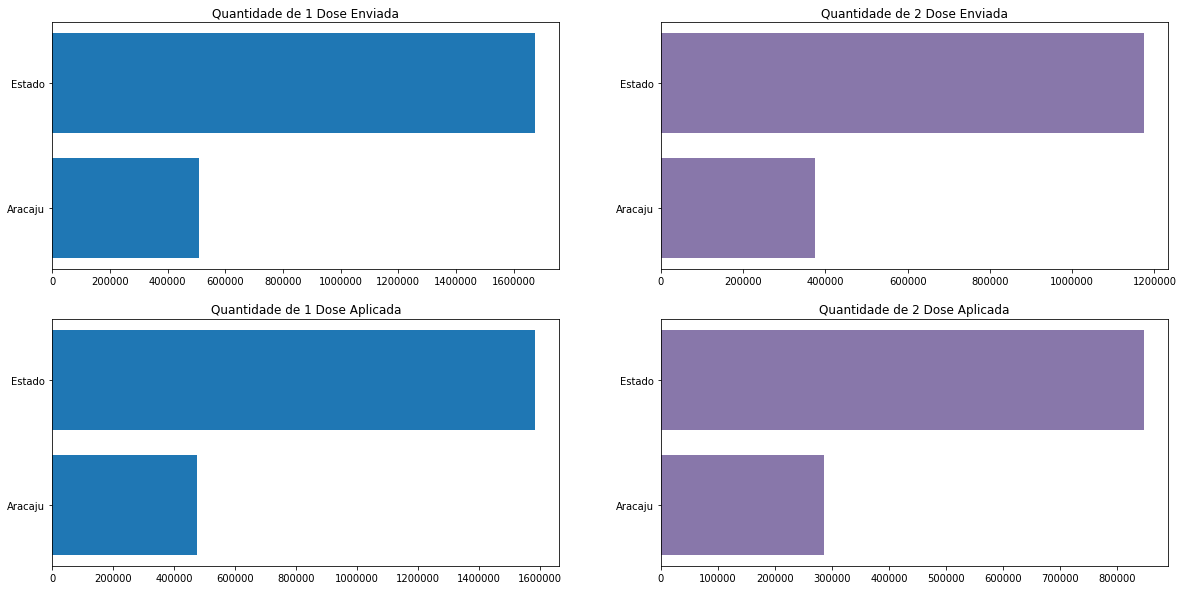

In [24]:
municipio_selecionado = "Aracaju"
# Pega todos os valores do município selecionado
valores_selecionado = df_doses.loc[df_doses['Município'] == municipio_selecionado].iloc[:, 2:].values.tolist()[0]
num_doses_1_enviadas = valores_selecionado[0]
num_doses_2_enviadas = valores_selecionado[1]
num_doses_1_aplicadas = valores_selecionado[2]
num_doses_2_aplicadas = valores_selecionado[3]

valores_totais = list(df_doses.iloc[len(df_doses)-1, 2:])
total_doses_1_enviadas = valores_totais[0]
total_doses_2_enviadas = valores_totais[1]
total_doses_1_aplicadas = valores_totais[2]
total_doses_2_aplicadas = valores_totais[3]

eixo_x = [1, 2]
eixo_y_1 = [num_doses_1_enviadas, total_doses_1_enviadas]
eixo_y_2 = [num_doses_2_enviadas, total_doses_2_enviadas]
eixo_y_3 = [num_doses_1_aplicadas, total_doses_1_aplicadas]
eixo_y_4 = [num_doses_2_aplicadas, total_doses_2_aplicadas]

fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].barh(eixo_x, eixo_y_1)
ax[0,0].set_title('Quantidade de 1 Dose Enviada')
ax[0,0].ticklabel_format(axis = 'x', style='plain')
ax[0,0].set_yticks([1, 2])
ax[0,0].set_yticklabels([municipio_selecionado, 'Estado'])

ax[0,1].barh(eixo_x, eixo_y_2, color='#8877AA')
ax[0,1].set_title('Quantidade de 2 Dose Enviada')
ax[0,1].ticklabel_format(axis = 'x', style='plain')
ax[0,1].set_yticks([1, 2])
ax[0,1].set_yticklabels([municipio_selecionado, 'Estado'])

ax[1,0].barh(eixo_x, eixo_y_3)
ax[1,0].set_title('Quantidade de 1 Dose Aplicada')
ax[1,0].ticklabel_format(axis = 'x', style='plain')
ax[1,0].set_yticks([1, 2])
ax[1,0].set_yticklabels([municipio_selecionado, 'Estado'])

ax[1,1].barh(eixo_x, eixo_y_4, color='#8877AA')
ax[1,1].set_title('Quantidade de 2 Dose Aplicada')
ax[1,1].ticklabel_format(axis = 'x', style='plain')
ax[1,1].set_yticks([1, 2])
ax[1,1].set_yticklabels([municipio_selecionado, 'Estado'])

plt.show()

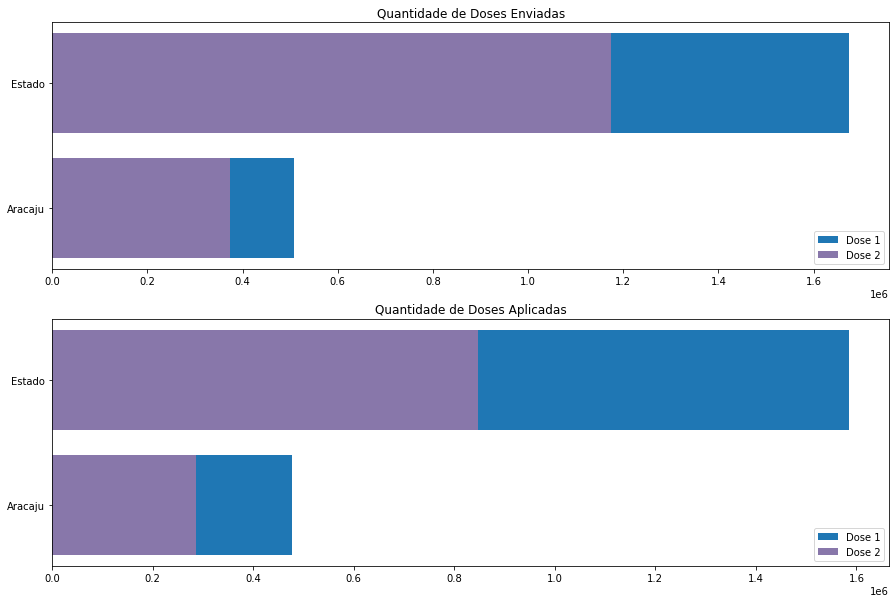

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0].barh(eixo_x, eixo_y_1, label='Dose 1')
ax[0].barh(eixo_x, eixo_y_2, color='#8877AA', label='Dose 2')
ax[0].set_title('Quantidade de Doses Enviadas')
ax[0].set_yticks([1, 2])
ax[0].set_yticklabels([municipio_selecionado, 'Estado'])
ax[0].legend()

ax[1].barh(eixo_x, eixo_y_3, label='Dose 1')
ax[1].barh(eixo_x, eixo_y_4, color='#8877AA', label='Dose 2')
ax[1].set_title('Quantidade de Doses Aplicadas')
ax[1].set_yticks([1, 2])
ax[1].set_yticklabels([municipio_selecionado, 'Estado'])
ax[1].legend()

plt.show()

## Cobertura da 1ª Dose

In [ ]:
cobertura_1_dose.head()

,Município,População Total,População Geral
0,Amparo de São Francisco,2380,0.206723
1,Aquidabã,21681,0.149716
2,Aracaju,664908,0.175796
3,Arauá,9947,0.156329
4,Areia Branca,18686,0.124318


In [ ]:
cobertura_1_dose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Município        76 non-null     object 
 1   População Total  76 non-null     int64  
 2   População Geral  76 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
# Tira a última linha com o total e deixa apenas os números dos municípios

cobertura_1_dose = cobertura_1_dose.iloc[:75, :]

In [ ]:
mapa_cobertura_1_dose = pd.concat([cobertura_1_dose, df_sergipe_mapa], axis=1)
mapa_cobertura_1_dose = gpd.GeoDataFrame(mapa_cobertura_1_dose, geometry='geometry')
mapa_cobertura_1_dose.head()

,Município,População Total,População Geral,NM_MUNICIP,CD_GEOCMU,geometry
0,Amparo de São Francisco,2380,0.206723,AMPARO DE SÃO FRANCISCO,2800100,"POLYGON ((-36.92631 -10.12655, -36.92575 -10.1..."
1,Aquidabã,21681,0.149716,AQUIDABÃ,2800209,"POLYGON ((-37.05740 -10.18109, -37.01690 -10.1..."
2,Aracaju,664908,0.175796,ARACAJU,2800308,"POLYGON ((-37.03528 -10.87519, -37.03643 -10.8..."
3,Arauá,9947,0.156329,ARAUÁ,2800407,"MULTIPOLYGON (((-37.63498 -11.34699, -37.63843..."
4,Areia Branca,18686,0.124318,AREIA BRANCA,2800506,"POLYGON ((-37.28128 -10.72058, -37.28128 -10.7..."


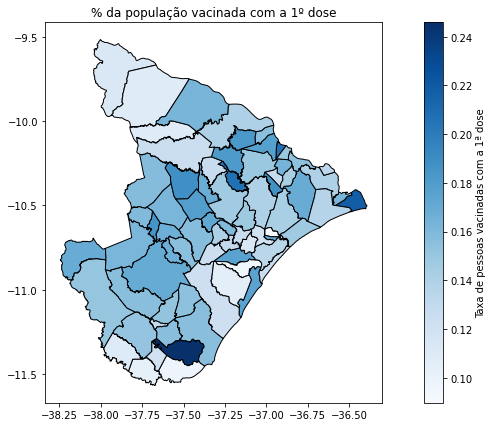

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

mapa_cobertura_1_dose.plot(column='População Geral', ax=ax, legend=True, cmap='Blues', edgecolor='black',
          legend_kwds={'label': "Taxa de pessoas vacinadas com a 1ª dose",'orientation': "vertical"})
ax.set_title("% da população vacinada com a 1º dose")

plt.show()

In [ ]:
# Preparo as listas que serão utilizadas para fazer o gráfico com a comparação entre município, maior, menor e valor médio

municipio_selecionado = "Aquidabã"  # Selecione um município

menor = mapa_cobertura_1_dose['População Geral'].min()  
media = mapa_cobertura_1_dose['População Geral'].mean()
maior = mapa_cobertura_1_dose['População Geral'].max()

valor_municipio_selecionado = mapa_cobertura_1_dose.loc[mapa_cobertura_1_dose['Município'] == municipio_selecionado]['População Geral']  # Pego o valor do municipio selecionado na coluna
valor_municipio_selecionado = float(valor_municipio_selecionado)
lista_valores_y = [menor, media, valor_municipio_selecionado, maior]
lista_valores_y.sort()
lista_cidades_x = []  # Armazena os nomes dos: município com menor valor, municipio selecionado, Media, município com maior valor
# Uso o indice para acessar o nome dos municipios referentes aos valores: menor, maior
indice = list(mapa_cobertura_1_dose['População Geral']).index(menor)
lista_cidades_x.append(mapa_cobertura_1_dose['Município'][indice] + " (Valor Mínimo)")

if media > valor_municipio_selecionado:    # Organizo em ordem crescente, comparando se o valor do municipio selecionado é maior ou menor que a media
  lista_cidades_x.append(municipio_selecionado)
  lista_cidades_x.append("Média")
else:
  lista_cidades_x.append("Média")
  lista_cidades_x.append(municipio_selecionado)

indice = list(mapa_cobertura_1_dose['População Geral']).index(maior)
lista_cidades_x.append(mapa_cobertura_1_dose['Município'][indice] + " (Valor Máximo)")

Text(0.5, 1.0, '% da população vacinada com a 1ª dose')

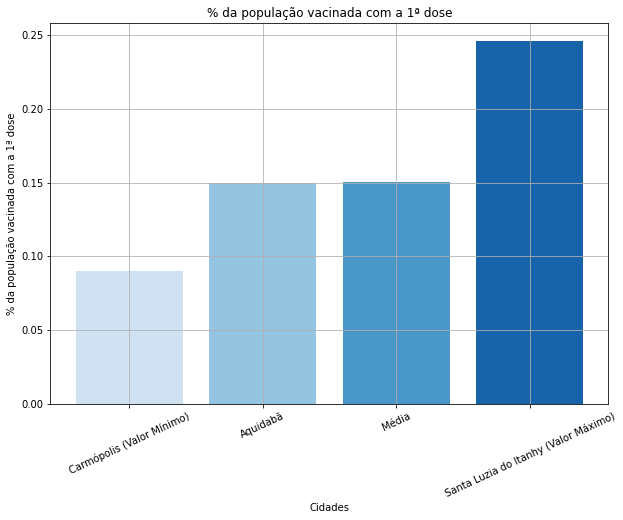

In [ ]:
palette1 = sns.color_palette("Blues", 4)

fig,ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(lista_cidades_x,lista_valores_y, color=palette1)
ax.set_ylabel('% da população vacinada com a 1ª dose')
ax.set_xlabel('Cidades')
ax.set_xticklabels(lista_cidades_x, rotation=25)
ax.grid(True)
ax.set_title('% da população vacinada com a 1ª dose')

## Cobertura da 2ª Dose

In [ ]:
cobertura_2_dose.head()

,Município,População Total,População Geral.1
0,Amparo de São Francisco,2380,0.083613
1,Aquidabã,21681,0.077533
2,Aracaju,664908,0.059438
3,Arauá,9947,0.089173
4,Areia Branca,18686,0.070320


In [ ]:
cobertura_2_dose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Município          76 non-null     object 
 1   População Total    76 non-null     int64  
 2   População Geral.1  76 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
# Tira a última linha com o total e deixa apenas os números dos municípios

cobertura_2_dose = cobertura_2_dose.iloc[:75, :]

In [ ]:
mapa_cobertura_2_dose = pd.concat([cobertura_2_dose, df_sergipe_mapa], axis=1)
mapa_cobertura_2_dose = gpd.GeoDataFrame(mapa_cobertura_2_dose, geometry='geometry')
mapa_cobertura_2_dose.head()

,Município,População Total,População Geral.1,NM_MUNICIP,CD_GEOCMU,geometry
0,Amparo de São Francisco,2380,0.083613,AMPARO DE SÃO FRANCISCO,2800100,"POLYGON ((-36.92631 -10.12655, -36.92575 -10.1..."
1,Aquidabã,21681,0.077533,AQUIDABÃ,2800209,"POLYGON ((-37.05740 -10.18109, -37.01690 -10.1..."
2,Aracaju,664908,0.059438,ARACAJU,2800308,"POLYGON ((-37.03528 -10.87519, -37.03643 -10.8..."
3,Arauá,9947,0.089173,ARAUÁ,2800407,"MULTIPOLYGON (((-37.63498 -11.34699, -37.63843..."
4,Areia Branca,18686,0.070320,AREIA BRANCA,2800506,"POLYGON ((-37.28128 -10.72058, -37.28128 -10.7..."


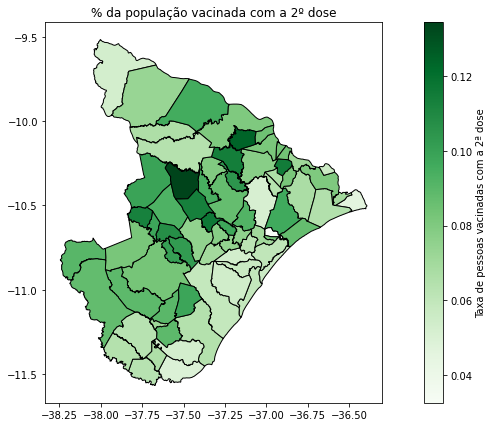

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

mapa_cobertura_2_dose.plot(column='População Geral.1', ax=ax, legend=True, cmap='Greens', edgecolor='black',
          legend_kwds={'label': "Taxa de pessoas vacinadas com a 2ª dose",'orientation': "vertical"})
ax.set_title("% da população vacinada com a 2º dose")

plt.show()

In [ ]:
# Preparo as listas que serão utilizadas para fazer o gráfico com a comparação entre município, maior, menor e valor médio

municipio_selecionado = "Aquidabã"  # Selecione um município

menor = mapa_cobertura_2_dose['População Geral.1'].min()  
media = mapa_cobertura_2_dose['População Geral.1'].mean()
maior = mapa_cobertura_2_dose['População Geral.1'].max()

valor_municipio_selecionado = mapa_cobertura_2_dose.loc[mapa_cobertura_2_dose['Município'] == municipio_selecionado]['População Geral.1']  # Pego o valor do municipio selecionado na coluna
valor_municipio_selecionado = float(valor_municipio_selecionado)
lista_valores_y = [menor, media, valor_municipio_selecionado, maior]
lista_valores_y.sort()
lista_cidades_x = []  # Armazena os nomes dos: município com menor valor, municipio selecionado, Media, município com maior valor
# Uso o indice para acessar o nome dos municipios referentes aos valores: menor, maior
indice = list(mapa_cobertura_2_dose['População Geral.1']).index(menor)
lista_cidades_x.append(mapa_cobertura_2_dose['Município'][indice] + " (Valor Mínimo)")

if media > valor_municipio_selecionado:    # Organizo em ordem crescente, comparando se o valor do municipio selecionado é maior ou menor que a media
  lista_cidades_x.append(municipio_selecionado)
  lista_cidades_x.append("Média")
else:
  lista_cidades_x.append("Média")
  lista_cidades_x.append(municipio_selecionado)

indice = list(mapa_cobertura_2_dose['População Geral.1']).index(maior)
lista_cidades_x.append(mapa_cobertura_2_dose['Município'][indice] + " (Valor Máximo)")

Text(0.5, 1.0, '% da população vacinada com a 1ª dose')

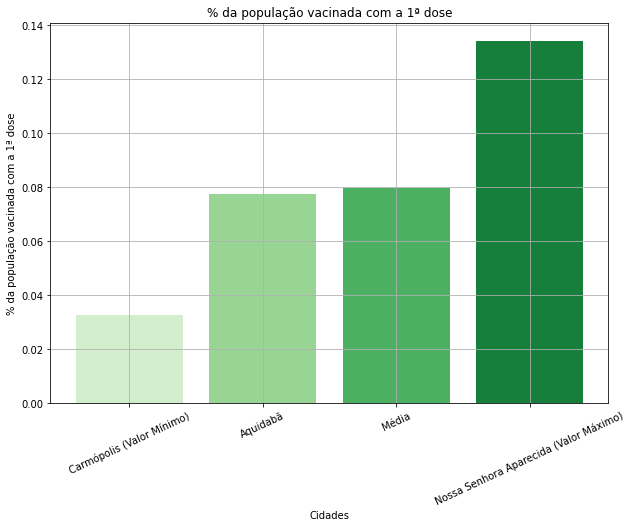

In [ ]:
palette1 = sns.color_palette("Greens", 4)

fig,ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(lista_cidades_x,lista_valores_y, color=palette1)
ax.set_ylabel('% da população vacinada com a 1ª dose')
ax.set_xlabel('Cidades')
ax.set_xticklabels(lista_cidades_x, rotation=25)
ax.grid(True)
ax.set_title('% da população vacinada com a 1ª dose')